In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

healthData = pd.read_csv('./datasets/train_data.csv', delimiter=',')
healthData.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [2]:
#remove ID and HealthServiceArea
healthData = healthData.drop(columns='ID')
healthData = healthData.drop(columns='HealthServiceArea')

healthData.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [3]:
healthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

In [4]:

#converting categorical columns to categorical data type
for col in healthData.columns:
    if healthData[col].dtype == object:
        healthData[col] = healthData[col].astype('category')
        


In [5]:
healthData['LengthOfStay'] = pd.cut(healthData.LengthOfStay, bins=[0,4,11], labels=[0, 1], right=False)
healthData['LengthOfStay'] = healthData['LengthOfStay'].astype('category')

In [6]:
healthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Gender                        59966 non-null  category
 1   Race                          59966 non-null  category
 2   TypeOfAdmission               59966 non-null  category
 3   CCSProcedureCode              59966 non-null  int64   
 4   APRSeverityOfIllnessCode      59966 non-null  int64   
 5   PaymentTypology               59966 non-null  category
 6   BirthWeight                   59966 non-null  int64   
 7   EmergencyDepartmentIndicator  59966 non-null  category
 8   AverageCostInCounty           59966 non-null  int64   
 9   AverageChargesInCounty        59966 non-null  int64   
 10  AverageCostInFacility         59966 non-null  int64   
 11  AverageChargesInFacility      59966 non-null  int64   
 12  AverageIncomeInZipCode        59966 non-null  

In [7]:
pd.isna(healthData).sum()

Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
LengthOfStay                    0
dtype: int64

In [8]:
healthData.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000


In [9]:
healthData['LengthOfStay'].value_counts().sort_index()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

In [10]:
target = healthData['LengthOfStay']
attributes = healthData.drop(columns='LengthOfStay')

In [11]:
attributesNum = pd.get_dummies(attributes)
attributesNum.head()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,Gender_F,Gender_M,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,228,1,3700,2611,9227,1751,8951,45,1,0,...,0,0,1,0,0,0,0,0,1,0
1,228,1,2900,3242,8966,3338,6409,34,0,1,...,0,0,1,0,0,0,0,0,1,0
2,220,1,3200,3155,11381,4980,9323,45,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,1,3300,3155,11381,5826,15680,59,1,0,...,0,0,0,0,0,1,0,0,1,0
4,228,1,2600,2611,9227,6000,14344,59,1,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
from sklearn import preprocessing 
  
le = preprocessing.LabelEncoder()
le.fit(target)
target_labels = le.inverse_transform([0,1])
target = le.transform(target)
print(target)
print(target_labels)


[0 0 0 ... 1 1 1]
[0 1]


In [13]:
from sklearn.model_selection import train_test_split 
  
with pd.option_context('mode.chained_assignment', None): 
    train_data_X_, test_data_X, train_data_y_ , test_data_y = train_test_split(attributesNum, target, test_size=0.2,  
                                              shuffle=True,random_state=0) 
     
with pd.option_context('mode.chained_assignment', None): 
    train_data_X, val_data_X, train_data_y, val_data_y = train_test_split(train_data_X_, train_data_y_, test_size=0.25,  
                                            shuffle=True,random_state=0) 
     
print(train_data_X.shape, val_data_X.shape, test_data_X.shape)  

(35979, 30) (11993, 30) (11994, 30)


In [14]:
train_X = train_data_X.to_numpy() 
train_y = train_data_y 
  
test_X = test_data_X.to_numpy() 
test_y = test_data_y 
  
val_X = val_data_X.to_numpy() 
val_y = val_data_y

In [19]:
import graphviz  
  
def get_tree_2_plot(clf): 
    dot_data = tree.export_graphviz(clf, out_file=None,  
                      feature_names=attributesNum.columns,   
                      class_names=(['0', '1']),
                      special_characters=True,
                      filled=True, rounded=True)   
    graph = graphviz.Source(dot_data)  
    return graph 

In [20]:
from sklearn.metrics import f1_score 
  
def get_acc_scores(clf, train_X, train_y, val_X, val_y): 
    train_pred = clf.predict(train_X) 
    val_pred = clf.predict(val_X) 
     
    train_acc = f1_score(train_y, train_pred, average='macro') 
    val_acc = f1_score(val_y, val_pred, average='macro') 
     
    return train_acc, val_acc 

In [27]:
from sklearn import tree 
  
tree_max_depth = 2   #trial and error which depth is better in terms of information gain, justify
  
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced') 
clf = clf.fit(train_X, train_y) 

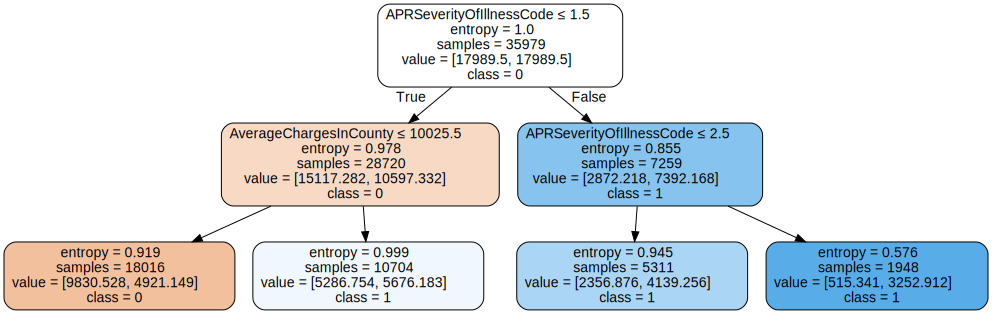

In [28]:
Dtree = get_tree_2_plot(clf) 
Dtree 

In [26]:
train_acc, val_acc = get_acc_scores(clf,train_X, train_y, val_X, val_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

Train f1 score: 0.612
Validation f1 score: 0.605


In [30]:
#POST PRUNING
max_depths = [2,4,5,8,10,11]

train_hold = list()
val_hold = list()

for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf = clf.fit(train_X, train_y)
    
    train_acc, val_acc = get_acc_scores(clf, train_X, train_y, val_X, val_y)
    
    train_hold.append(train_acc)
    val_hold.append(val_acc)

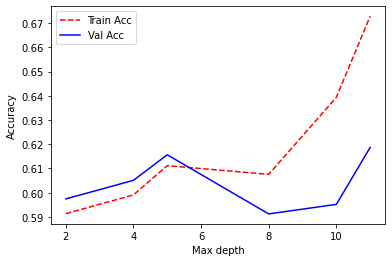

In [31]:
#POST PRUNING
plt.plot(max_depths, train_hold, 'r--')
plt.plot(max_depths, val_hold, 'b-')
plt.legend(['Train Acc','Val Acc'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#analyze which depth is optimal for the data